In [379]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import rcParams
# rcParams['font.family'] = 'monospace'
font = {'family' : 'monospace',
        'weight' : 'bold',
        'size'   : 'xx-large'
       }


# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# ride_df = ride_df.groupby(["city"])["ride_id"]


# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)



# Display the data table for preview
city_df.tail() # Right: city, drive_count, type
ride_df.tail() # Left: city, date, fare, ride_id


,city,date,fare,ride_id
2370,Michaelberg,2018-04-29 17:04:39,13.38,8550365057598
2371,Lake Latoyabury,2018-01-30 00:05:47,20.76,9018727594352
2372,North Jaime,2018-02-10 21:03:50,11.11,2781339863778
2373,West Heather,2018-05-07 19:22:15,44.94,4256853490277
2374,Newtonview,2018-04-25 10:20:13,55.84,9990581345298


In [380]:
# Merge the data into a single dataframe
# merge_df = pd.merge(file_left_df, file_right_df, on="column name")

city_ride_df = pd.merge(ride_df, city_df, on="city", how="inner")
city_ride_df.sort_values(by = "city", ascending = False)
city_ride_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [381]:
# df.groupby('sorting value column')['column of value to sort'].nunique()
city_count = city_ride_df.groupby("city")["ride_id"].count() # x value
city_fare = city_ride_df.groupby("city")["fare"].mean() # y value
city_driver = city_ride_df.groupby("city")["driver_count"].sum()
city_type = city_ride_df["type"].value_counts() # total ride by city type
total_rides = len(city_ride_df)

# city_count
# city_fare
# city_driver
# city_type
total_rides

2375

## Bubble Plot of Ride Sharing Data

<function matplotlib.pyplot.show(*args, **kw)>

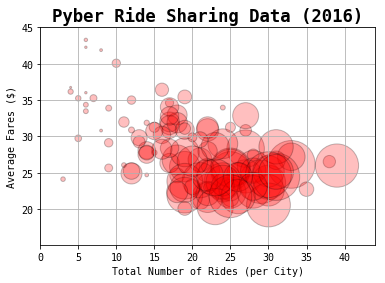

In [382]:
# Obtain the x and y coordinates for each of the three city types
x_axis = city_count
y_axis = city_fare

# colors = {'Urban': 'r', 'Suburban': 'b', 'Rural': 'y'}
# colors = [x for x in city_type if x = "u"]

# city_type =city_type.replace("Urban", "r").replace("Suburban", "b").replace("Rural", "y")

# new_things = ["something with " + ITEM for ITEM in old_things if condition_based_on(ITEM)]


# df.plot(color=[gcolors[group] for group in SampleGroups])


# Build the scatter plots for each city types

plt.scatter(x_axis, y_axis, marker="o", facecolors="r", edgecolors="black", s=city_driver, alpha=0.25)

# Incorporate the other graph properties
tick_locations = [value for value in x_axis]
plt.xlim(0, max(x_axis + 5))
plt.ylim(min(y_axis - 5), 45)

plt.grid()
# Create a legend


# Incorporate a text label regarding circle size


plt.xlabel("Total Number of Rides (per City)")
plt.ylabel("Average Fares ($)")
plt.title("Pyber Ride Sharing Data (2016)", **font)


# Save Figure

plt.show

In [383]:
# Show plot
plt.show()

In [384]:
city_ride_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Total Fares by City Type

Text(0.5, 1.0, 'Total Fares by City Type (2016)')

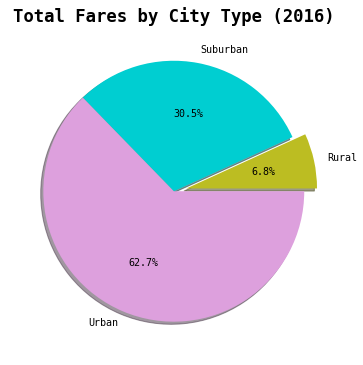

In [385]:
# Calculate Type Percents

fares = city_ride_df.groupby("type")["fare"].sum()
fares_percentages = fares/total_rides
sizes = list(fares_type)
labels = fares.index
explode = [.1, 0, 0]
colors = ["tab:olive", "darkturquoise", "plum"]

# Build Pie Chart

plt.figure(figsize=(8, 6)) #??
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=0)
plt.title("Total Fares by City Type (2016)", **font)

# plt.axis(["equal"])
# Save Figure


## Total Rides by City Type

Urban       1625
Suburban     625
Rural        125
Name: type, dtype: int64

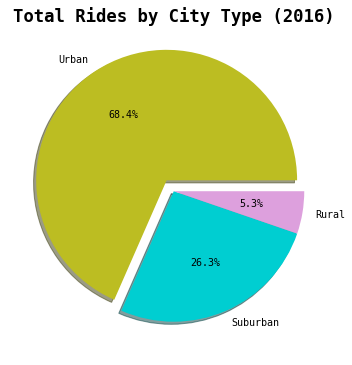

In [386]:
# Calculate Ride Percents
total_rides = len(city_ride_df)
rides = city_ride_df["type"].value_counts()
rides_percentages = rides/total_rides
sizes = list(rides_percentages)
labels = rides.index
# FIX COLORS

# Build Pie Chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=0)
plt.title("Total Rides by City Type (2016)", **font)

# Save Figure
rides

In [387]:
# Show Figure
plt.show()
city_ride_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Total Drivers by City Type

type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64

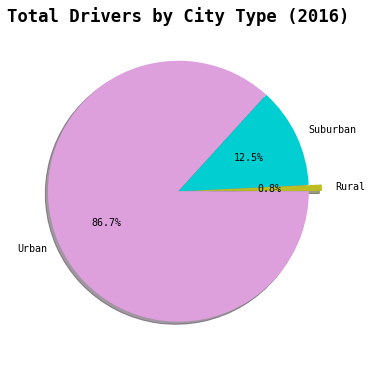

In [390]:
# Calculate Ride Percents
total_drivers = city_ride_df["driver_count"].sum()
drivers = city_ride_df.groupby("type")["driver_count"].sum()
drivers_percentages = drivers/total_drivers
sizes = list(drivers_percentages)
labels = drivers.index

# Build Pie Chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=0)
plt.title("Total Drivers by City Type (2016)", **font)

# Save Figure
total_drivers
drivers

In [389]:
# Show Figure
plt.show()